### Create mixed worm datasets of various sizes by subsampling all worms from every source dataset.
---
*Last updated: 4 June 2024*

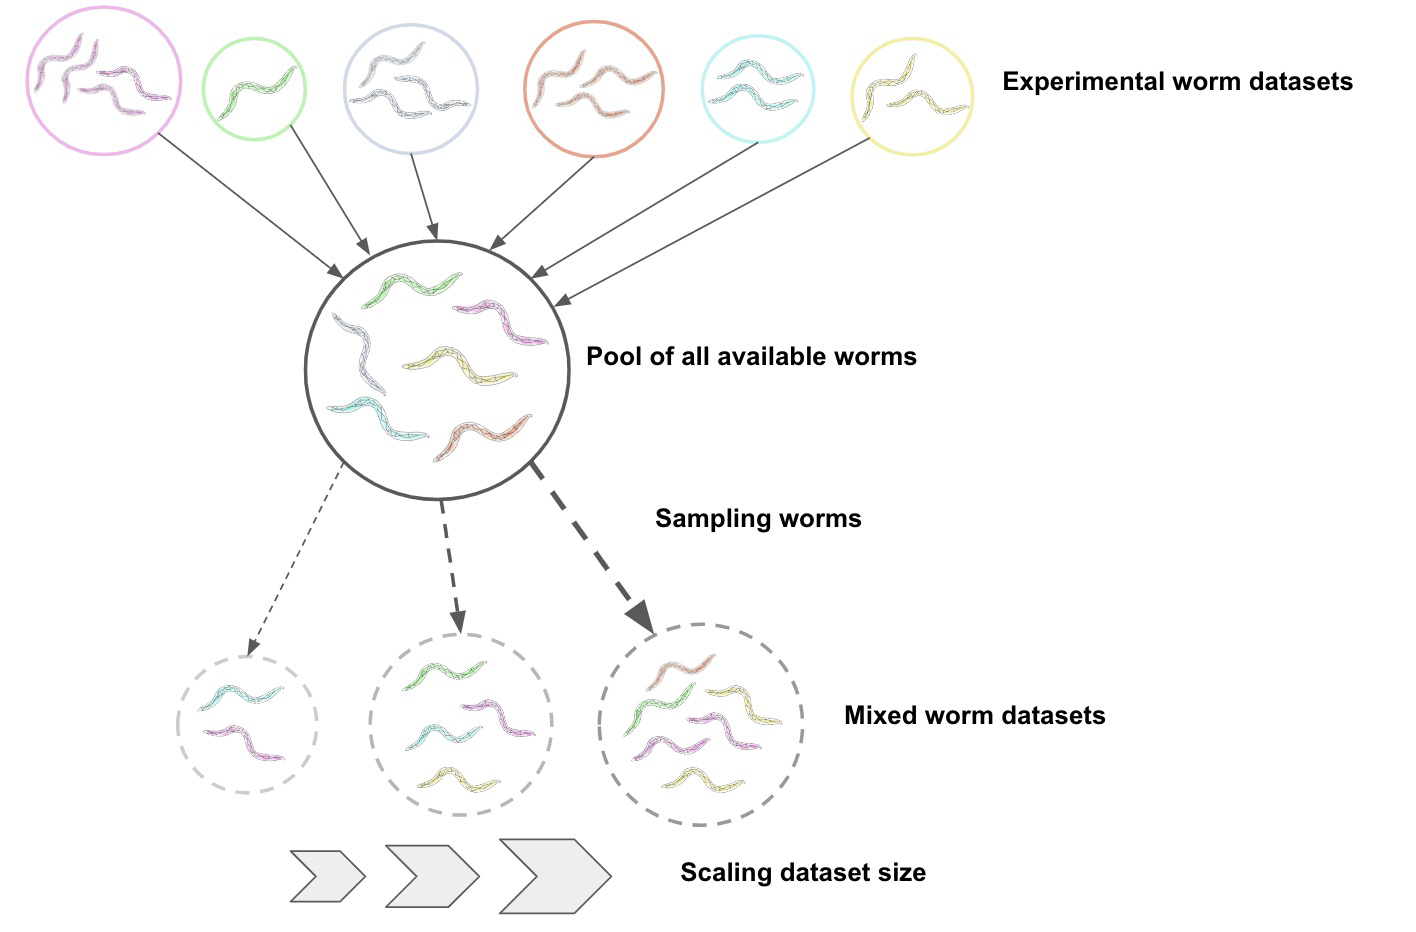

In [1]:
### DEBUG ###
import os
from omegaconf import OmegaConf
from data._main import get_datasets
from utils import EXPERIMENT_DATASETS, ROOT_DIR

config = OmegaConf.load("../configs/submodule/data.yaml")

print()

print(OmegaConf.to_yaml(config), end="\n\n")

data_config = config.dataset

# TODO: FIX. This will throw an error becasue `get_datasets` returns a tuple (train_dataset, val_dataset)
dataset = get_datasets(data_config, save=False)

source_datasets = config.dataset.source_datasets

type(source_datasets)

all_experiment = all(
    [
        (dataset in source_datasets and source_datasets[dataset] == "all")
        for dataset in EXPERIMENT_DATASETS
    ]
)

if all_experiment:
    data_config.use_these_datasets.path = os.path.join(ROOT_DIR, "data", "combined_AllExperimental")

assert os.path.isdir(
    data_config.use_these_datasets.path
), f"Directory {data_config.use_these_datasets.path} does not exist."
### DEBUG ###

2024-05-06 20:15:18,137 - INFO - Loading provided train dataset from /net/vast-storage/scratch/vast/yanglab/qsimeon/worm-graph/data/combined_AllExperimental.


CUDA device found.

dataset:
  use_these_datasets:
    path: null
    num_worms: null
  save_datasets: true
  source_datasets:
    Kato2015: all
    Nichols2017: all
    Skora2018: all
    Kaplan2020: all
    Yemini2021: all
    Uzel2022: all
    Lin2023: all
    Flavell2023: all
    Leifer2023: all
  num_labeled_neurons: null
  seq_len: null
  num_train_samples: 32
  num_val_samples: 32
  reverse: false
  use_residual: false
  use_smooth: true
  train_split_first: true
  train_split_ratio: 0.5




2024-05-06 20:15:24,933 - INFO - Loading provided validation dataset from /net/vast-storage/scratch/vast/yanglab/qsimeon/worm-graph/data/combined_AllExperimental.
2024-05-06 20:15:32,572 - INFO - Creating combined dataset using pickle file from /net/vast-storage/scratch/vast/yanglab/qsimeon/worm-graph/data/combined_AllExperimental.
2024-05-06 20:15:38,455 - INFO - Chosen sequence length: 348



In [50]:
import os
import pickle
import numpy as np

from pprint import PrettyPrinter
from itertools import combinations
from utils import init_random_seeds
from data._utils import generate_all_subsets, generate_subsets_of_size

# # Initialize the random seeds
# init_random_seeds(42)

In [51]:
# Settings for pretty printing
pp = PrettyPrinter(indent=4, width=100, compact=True)

# Choose which dataset to work with
## Synthetic datasets ###
datadir = "processed/neural"
# file = os.path.join(datadir, "Sines0000.pickle")
# file = os.path.join(datadir, "Lorenz0000.pickle")
# file = os.path.join(datadir, "WhiteNoise0000.pickle")
# file = os.path.join(datadir, "RandWalk0000.pickle")
# file = os.path.join(datadir, "VanDerPol0000.pickle")
file = os.path.join(datadir, "Wikitext0000.pickle")
###########################################

# ### Combined experimental datasets ###
# datadir = "combined_AllExperimental"
# file = os.path.join(datadir, "combined_dataset.pickle")
# ############################################

# Load combined dataset and print some information about it
combined_dataset = pickle.load(open(file, "rb"))  # a few GBs large
num_worms = len(combined_dataset.keys())

In [52]:
# Print some information about the dataset
print(f"number of worms (N): {num_worms}", end="\n\n")
pp.pprint("all worm IDs: {}".format(list(combined_dataset.keys())))
print()
print(f"data keys for each worm' data:")
pp.pprint(list(combined_dataset["worm0"].keys()))
print()

# Example of choosing all subsets of size n = N-1 of the wormIDs,
# where N is the number of worms in the combined dataset
all_worm_ids = list(combined_dataset.keys())
N = num_worms
worm_subsets = combinations(all_worm_ids, N - 1)

# Print some information about the subsets
first_n_subsets = 3  # can be very long if we display all
last_x_items = 5  # can be very long if we display all
print(f"Last {last_x_items} items of the first {first_n_subsets} subset sizes:")
for i, subset in enumerate(worm_subsets):
    print(f"\t{i}: {subset[-last_x_items:]}")
    if i == first_n_subsets - 1:
        break
print()

number of worms (N): 200

("all worm IDs: ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5', 'worm6', 'worm7', 'worm8', "
 "'worm9', 'worm10', 'worm11', 'worm12', 'worm13', 'worm14', 'worm15', 'worm16', 'worm17', "
 "'worm18', 'worm19', 'worm20', 'worm21', 'worm22', 'worm23', 'worm24', 'worm25', 'worm26', "
 "'worm27', 'worm28', 'worm29', 'worm30', 'worm31', 'worm32', 'worm33', 'worm34', 'worm35', "
 "'worm36', 'worm37', 'worm38', 'worm39', 'worm40', 'worm41', 'worm42', 'worm43', 'worm44', "
 "'worm45', 'worm46', 'worm47', 'worm48', 'worm49', 'worm50', 'worm51', 'worm52', 'worm53', "
 "'worm54', 'worm55', 'worm56', 'worm57', 'worm58', 'worm59', 'worm60', 'worm61', 'worm62', "
 "'worm63', 'worm64', 'worm65', 'worm66', 'worm67', 'worm68', 'worm69', 'worm70', 'worm71', "
 "'worm72', 'worm73', 'worm74', 'worm75', 'worm76', 'worm77', 'worm78', 'worm79', 'worm80', "
 "'worm81', 'worm82', 'worm83', 'worm84', 'worm85', 'worm86', 'worm87', 'worm88', 'worm89', "
 "'worm90', 'worm91', 'worm92

In [53]:
# Generate `num_examples` of all the possible size-`n` subsets;
# Returns a list of the data(sub)sets containing n worms.
num_examples = 5
n = 3
subsets_n = generate_subsets_of_size(
    combined_dataset,
    subset_size=n,
    max_subsets=num_examples,
    as_assignment=True,
)
print(f"type(subsets_n): {type(subsets_n)}")
print(f"len(subsets_n): {len(subsets_n)}")
print(f"type(subsets_n[0]): {type(subsets_n[0])}")
print()
print(f"\tExample # \t Dataset/Worms")
print(f"\t{'-'*40}")
for _, subset in enumerate(subsets_n):
    print(f"\t\t{_+1}: \t {tuple(subset.keys())}")
print()

type(subsets_n): <class 'list'>
len(subsets_n): 5
type(subsets_n[0]): <class 'dict'>

	Example # 	 Dataset/Worms
	----------------------------------------
		1: 	 ('Wikitext0000',)
		2: 	 ('Wikitext0000',)
		3: 	 ('Wikitext0000',)
		4: 	 ('Wikitext0000',)
		5: 	 ('Wikitext0000',)



In [54]:
# Generate `num_examples` of each size-`n` subset for n from 1 to N-1,
# where `N` is the number of worms in the combined dataset;
# returns dict mapping `n` to a list of datasets containing n worms
num_examples = 2
N = len(combined_dataset)
all_subsets = generate_all_subsets(
    combined_dataset,
    max_subsets_per_size=num_examples,  # `max_subsets_per_size` examples
    max_size=N - 1,  # n = max_size, the size of the largest subset to generate
    as_assignment=True,
)
print(f"\ttype(all_subsets): {type(all_subsets)}")
print(f"\tlen(all_subsets): {len(all_subsets)}")
print()

	type(all_subsets): <class 'dict'>
	len(all_subsets): 199



In [55]:
# By using the `as_assignment=True` argument, we get a way to distribute worms to different
# experimental datasets such that we achieve the desired combined dataset size.
print("Distribution of worms in the first assignment:")
for size, subsets in all_subsets.items():
    print(
        f"size {size}: \t num. subsets: {len(subsets)} \t example (1 of {num_examples}): {subsets[0]}"
    )
print()

print("Distribution of worms in the the second assignment:")
for size, subsets in all_subsets.items():
    print(
        f"size {size}: \t num. subsets: {len(subsets)} \t example (2 of {num_examples}): {subsets[1]}"
    )
print()

Distribution of worms in the first assignment:
size 1: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 1}
size 2: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 2}
size 3: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 3}
size 4: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 4}
size 5: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 5}
size 6: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 6}
size 7: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 7}
size 8: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 8}
size 9: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 9}
size 10: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 10}
size 11: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 11}
size 12: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 12}
size 13: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 13}
size 14: 	 num. subsets: 2 	 example (1 of 2): {'Wikitext0000': 14}
size 15: 	 num. sub

In [56]:
# Do one assignment for data subset sizes from 1 to N-1
num_examples = 1
N = len(combined_dataset)
all_subsets = generate_all_subsets(
    combined_dataset,
    max_subsets_per_size=num_examples,
    max_size=N - 1,  #  `max_size=None`/ `max_size=N` subsets of all sizes from 1 to N
    as_assignment=True,
)
print(f"\ttype(all_subsets): {type(all_subsets)}")
print(f"\tlen(all_subsets): {len(all_subsets)}")
print()
print("Distribution of worms in assignment:", end="\n\n")
for size, subsets in all_subsets.items():
    print(
        f"size {size}: \t num. subsets: {len(subsets)} \t example (1 of {num_examples}): {subsets[0]}"
    )
print()

	type(all_subsets): <class 'dict'>
	len(all_subsets): 199

Distribution of worms in assignment:

size 1: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 1}
size 2: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 2}
size 3: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 3}
size 4: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 4}
size 5: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 5}
size 6: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 6}
size 7: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 7}
size 8: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 8}
size 9: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 9}
size 10: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 10}
size 11: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 11}
size 12: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 12}
size 13: 	 num. subsets: 1 	 example (1 of 1): {'Wikitext0000': 13}
size 14: 	 num. subsets: 1 	 example 

In [57]:
# Example of how to get the Hydra config string
hydra_str = ""
sizes_to_keep = set(
    np.logspace(1, np.log10(max(all_subsets)), base=10, dtype=int, num=20)
)  # logarithmically spaced sizes
for size, subsets in all_subsets.items():
    # only keep sizes some sizes
    if size not in sizes_to_keep != 0:
        continue
    # removing quotes is important as hydra config parser treats parameters as a string
    _str = str(subsets[0]).replace("'", "")
    # need to remove space after colon (:) as hydra config parser throws an error otherwise
    _str = _str.replace(": ", ":")
    hydra_str += f"{_str},"
hydra_str = hydra_str[:-1]
print(f"{hydra_str}")

{Wikitext0000:10},{Wikitext0000:11},{Wikitext0000:13},{Wikitext0000:16},{Wikitext0000:18},{Wikitext0000:21},{Wikitext0000:25},{Wikitext0000:30},{Wikitext0000:35},{Wikitext0000:41},{Wikitext0000:48},{Wikitext0000:56},{Wikitext0000:66},{Wikitext0000:77},{Wikitext0000:90},{Wikitext0000:106},{Wikitext0000:124},{Wikitext0000:145},{Wikitext0000:170},{Wikitext0000:199}
